In [1]:
import sys
sys.path.insert(0, "/home/fox/py_projects/HawkesPyLib/LibTest")
from HawkesPyLib.simulation import ApproxPowerlawHawkesProcessSimulation
from HawkesPyLib.inference import ApproxPowerlawHawkesProcessInference, ExpHawkesProcessInference
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Initilize the simulator with some example parameters:

mu = 2.5
eta = 0.8
alpha = 0.4
tau0 = 0.01
m = 5.0
M = 5
PowlawSimulator = ApproxPowerlawHawkesProcessSimulation("powlaw", mu, eta, alpha, tau0, m, M)

# simulate timestamps
timestamps = PowlawSimulator.simulate(T=100.0)

# if needed change one of the parameter attributes:
mu = 10
PowlawSimulator.mu = mu
timestamps = PowlawSimulator.simulate(T=400.0)
print(f"{PowlawSimulator.n_jumps} timestamps were simulated")

20764 timestamps were simulated


In [3]:
# Initilize the Estimator class
PowlawEstimator = ApproxPowerlawHawkesProcessInference("powlaw", m=5.0, M=5)

# Estimate paramters
mu_hat, eta_hat, alpha_hat, tau0_hat = PowlawEstimator.estimate_grid(timestamps, T=timestamps[-1], return_params=True)

print(f"Estimated mu: {mu_hat:.2f}, vs. simulated mu: {mu}")
print(f"Estimated eta: {eta_hat:.2f}, vs. simulated eta: {eta}")
print(f"Estimated alpha: {alpha_hat:.2f}, vs. simulated alpha: {alpha}")
print(f"Estimated tau0: {tau0_hat:.2f}, vs. simulated tau0: {tau0}")

Estimated mu: 10.60, vs. simulated mu: 10
Estimated eta: 0.80, vs. simulated eta: 0.8
Estimated alpha: 0.42, vs. simulated alpha: 0.4
Estimated tau0: 0.01, vs. simulated tau0: 0.01


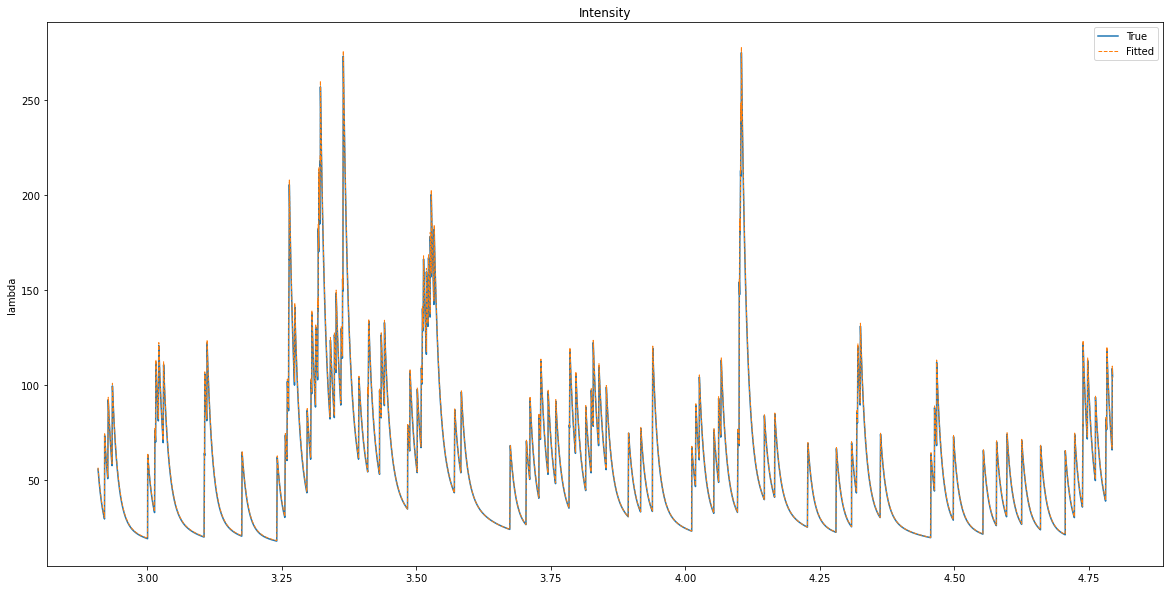

In [4]:
# compute the estimated and the true intensity
step_size = 0.001
intensity_true = PowlawSimulator.intensity(step_size)
intensity_fitted = PowlawEstimator.intensity(step_size)

# plot
fig, ax = plt.subplots(1, figsize=(20, 10))
end = 5000
start = 3000
ax.plot(intensity_true[start:end, 0], intensity_true[start:end, 1], label="True")
ax.plot(intensity_fitted[start:end:, 0], intensity_fitted[start:end, 1], label="Fitted", linewidth=1, linestyle="dashed")
ax.set_title("Intensity")
ax.set_ylabel("lambda")
ax.legend()



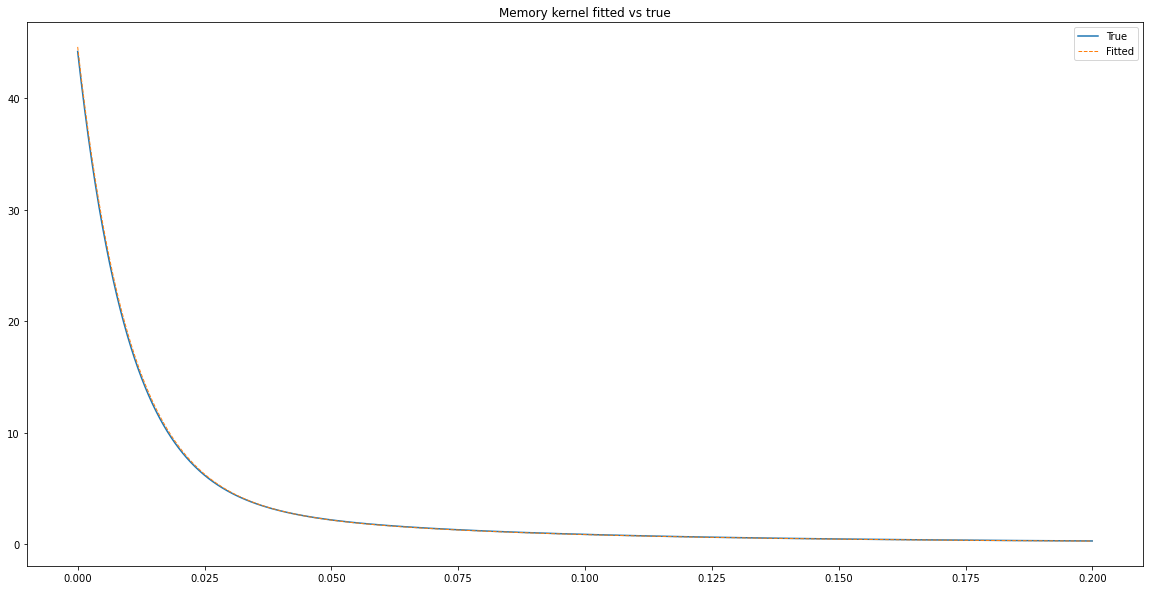

In [5]:
# compute the memory kernel values

times = np.linspace(0, 0.5, 10**4)
kernel_true = PowlawSimulator.kernel_values(times)
kernel_fitted = PowlawEstimator.kernel_values(times)

# plot
fig, ax = plt.subplots(1, figsize=(20, 10))
end = 4000
start = 0
ax.plot(times[start:end], kernel_true[start:end], label="True")
ax.plot(times[start:end], kernel_fitted[start:end], label="Fitted", linewidth=1, linestyle="dashed")
ax.set_title("Memory kernel fitted vs true")
ax.legend()


In [6]:
# Instead of estimating the simulated process with the exact same kernel we estimate under misspecifcation using 
# the single exponential memory kernel specification
ExpoEstimator = ExpHawkesProcessInference()

# Estimate paramters
mu_hat, eta_hat, theta_hat = ExpoEstimator.estimate_grid(timestamps, T=timestamps[-1], return_params=True)

print(f"Estimated mu: {mu_hat:.2f}, vs. simulated mu: {mu}")
print(f"Estimated eta: {eta_hat:.2f}, vs. simulated eta: {eta}")


Estimated mu: 19.65, vs. simulated mu: 10
Estimated eta: 0.62, vs. simulated eta: 0.8


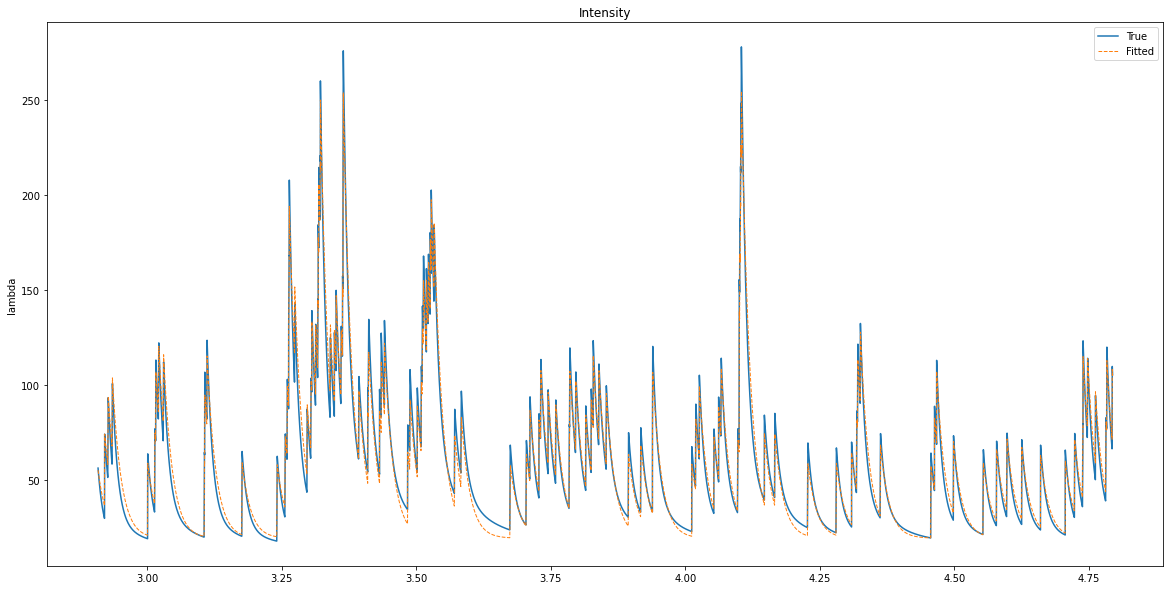

In [7]:
# compute the estimated and the true intensity
step_size = 0.001
intensity_true = PowlawEstimator.intensity(step_size)
intensity_fitted = ExpoEstimator.intensity(step_size)

# plot
fig, ax = plt.subplots(1, figsize=(20, 10))
end = 5000
start = 3000
ax.plot(intensity_true[start:end, 0], intensity_true[start:end, 1], label="True")
ax.plot(intensity_fitted[start:end:, 0], intensity_fitted[start:end, 1], label="Fitted", linewidth=1, linestyle="dashed")
ax.set_title("Intensity")
ax.set_ylabel("lambda")
ax.legend()



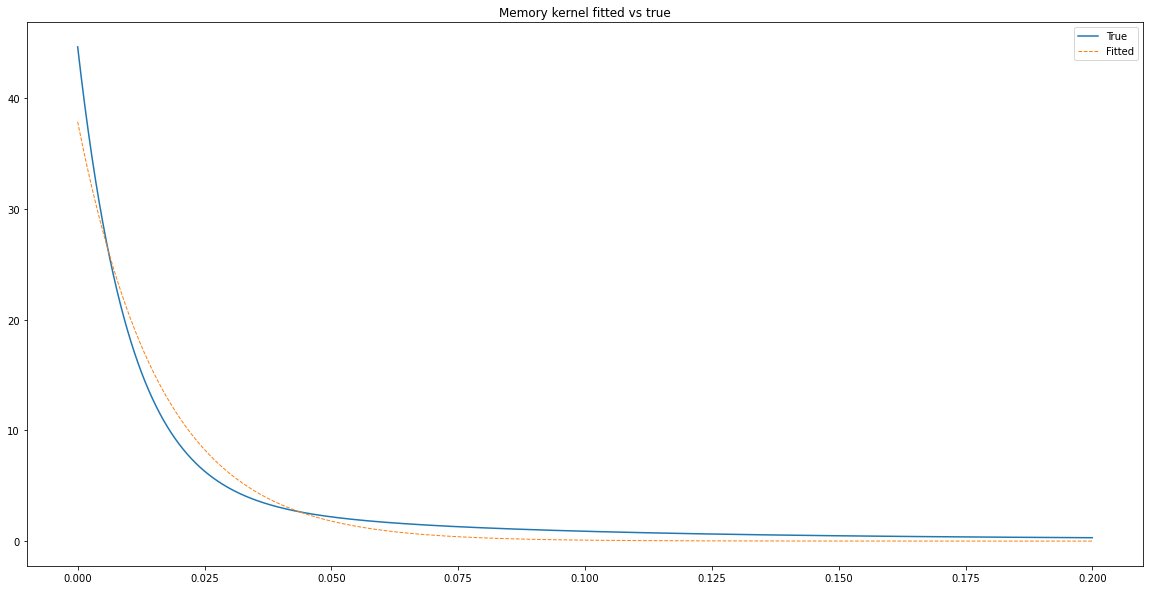

In [8]:
# compute the memory kernel values

times = np.linspace(0, 0.5, 10**4)
kernel_true = PowlawEstimator.kernel_values(times)
kernel_fitted = ExpoEstimator.kernel_values(times)

# plot
fig, ax = plt.subplots(1, figsize=(20, 10))
end = 4000
start = 0
ax.plot(times[start:end], kernel_true[start:end], label="True")
ax.plot(times[start:end], kernel_fitted[start:end], label="Fitted", linewidth=1, linestyle="dashed")
ax.set_title("Memory kernel fitted vs true")
ax.legend()
